## Testing Unet

## Image loading

In [12]:
from data_loader import *
device = torch.device("cuda" if torch.cuda.is_available() else ("mps" if torch.backends.mps.is_available() else "cpu"))

In [13]:
train_dataset = f"dataset/generated_cells"
dataset = SegmentationDataset(train_dataset)
print(f'Load images {train_dataset}: {len(dataset)} ')


img0, msk0 = dataset[0]
print('Check type and size of Torch tensor', type(img0), type(msk0))
print(f'Image[0]  {img0.shape} max: {img0.max():0.7f} max: {img0.min():0.7f} type: {img0.type()}')
print(f'Image[0]  {msk0.shape} max: {msk0.max():0.7f} max: {msk0.min():0.7f} type: {msk0.type()}')

Load images dataset/generated_cells: 102 
Check type and size of Torch tensor <class 'torch.Tensor'> <class 'torch.Tensor'>
Image[0]  torch.Size([1, 256, 256]) max: 1.0000000 max: 0.0000000 type: torch.FloatTensor
Image[0]  torch.Size([256, 256]) max: 1.0000000 max: 0.0000000 type: torch.LongTensor


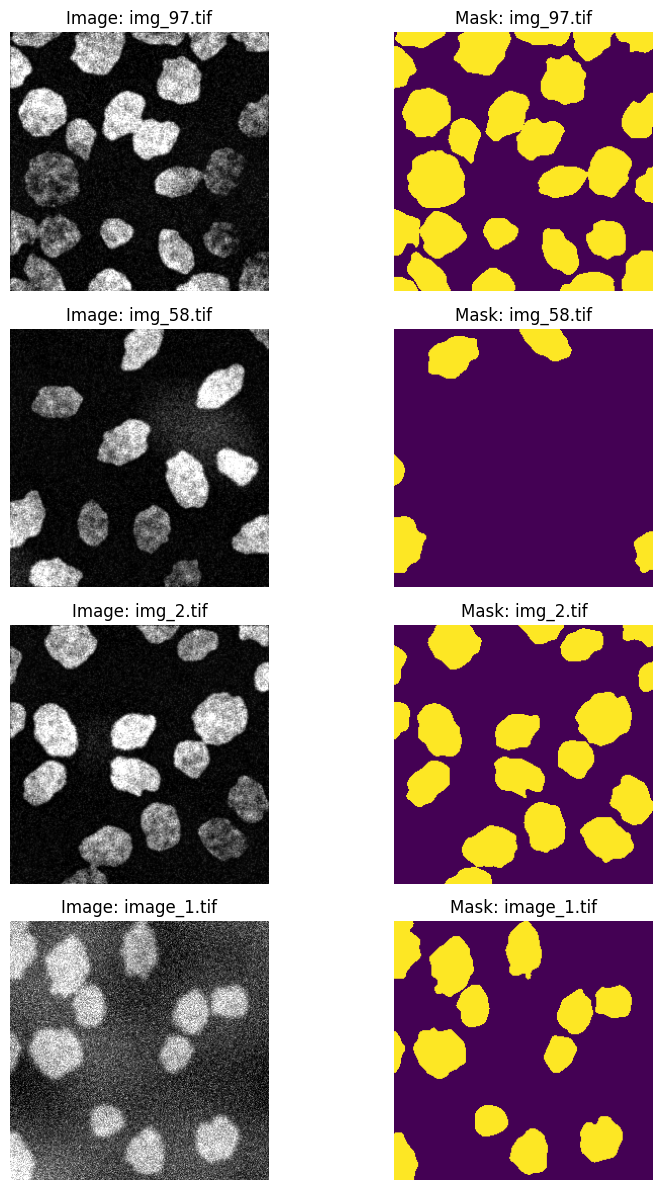

In [3]:
visualization_images(dataset, 4, 2)

In [14]:
val_ratio      = 0.25
batch_size     = 8
full_dataset = SegmentationDataset(train_dataset)
image0, mask0 = full_dataset[0]
print(type(image0))
print(f'Image 0 {image0.shape} max: {np.max(image0.shape)} {image0.type()}')
print(f'Image 0 {mask0.shape} max: {np.max(mask0.shape)} {mask0.type()}')
n_val   = max(1, int(len(full_dataset) * val_ratio))
n_train = len(full_dataset) - n_val

perm = torch.randperm(len(full_dataset)).tolist()
train_dataset = Subset(full_dataset, perm[n_val:])
val_dataset   = Subset(full_dataset, perm[:n_val])

# num_workers=0 avoids PicklingError in notebooks
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

print(f"Number of image in Train: {len(train_dataset)} | Val: {len(val_dataset)}")

<class 'torch.Tensor'>
Image 0 torch.Size([1, 256, 256]) max: 256 torch.FloatTensor
Image 0 torch.Size([256, 256]) max: 256 torch.LongTensor
Number of image in Train: 77 | Val: 25


In [9]:
import model
num_classes = 2
model = model.UNet(n_channels=1, n_classes=num_classes, first_layer_size=16, depth=2)

pretrained_model_name = None 

if pretrained_model_name != None:
    ckpt = torch.load(pretrained_model_name, map_location="cpu")
    # If it was trained with DataParallel and keys start with "module.", strip the prefix:
    if isinstance(ckpt, dict) and len(ckpt) and next(iter(ckpt)).startswith("module."):
        ckpt = {k.replace("module.", "", 1): v for k, v in ckpt.items()}
    print('Checkpoints of the preload_model {pretrained_weigths}', len(ckpt))
    model.load_state_dict(ckpt, strict=True) 

num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"UNet: {num_params} number of trainable parameters of model ")
print(f'Pretrained model: {pretrained_model_name}' )

UNet: 117090 number of trainable parameters of model 
Pretrained model: None


In [7]:
def binary_iou(img_true,img_pred):
    intersection = np.sum(np.multiply(img_true,img_pred))
    union = np.count_nonzero(img_true + img_pred)

    return intersection/union

<generator object _BaseKFold.split at 0x7f24ec6add60>

[Fold 1]
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([3, 1, 256, 256]) torch.Size([3, 1, 256, 256])
Fold 1 | Epoch 1/100 Train Loss: 0.7053 | Val Loss: 0.6710 | IoU: 0.0000


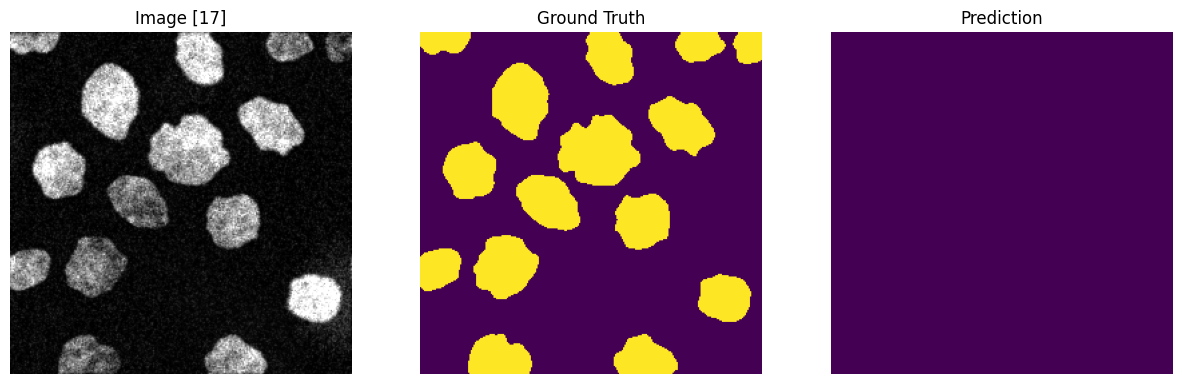

SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([3, 1, 256, 256]) torch.Size([3, 1, 256, 256])
Fold 1 | Epoch 2/100 Train Loss: 0.6269 | Val Loss: 0.6611 | IoU: 0.0000
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])
SHAPE IS torch.Size([3, 1, 256, 256]) torch.Size([3, 1, 

KeyboardInterrupt: 

In [9]:
import os
import numpy as np
from skimage import io, util
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import transforms
from model import UNet
from sklearn.model_selection import KFold
from sklearn.metrics import jaccard_score

import matplotlib.pyplot as plt

train_dataset = f"dataset/generated_cells"
dataset = SegmentationDataset(train_dataset)
learning_rate = 1e-5
batch_size = 10
num_epochs = 100

kf = KFold(n_splits=2, shuffle=True, random_state=42)
fold = 1
indices = np.arange(len(dataset))
print(kf.split(indices))
for train_index, valid_index in kf.split(indices):  # pass the list, not a string
    print(f"\n[Fold {fold}]")
    
    train_dataset = Subset(dataset, train_index)
    valid_dataset = Subset(dataset, valid_index)
    
    train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=8)


    model = UNet(n_channels=1, n_classes=1, first_layer_size=16, depth=2).to(device)
    


    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.BCEWithLogitsLoss()

    train_losses = []
    val_losses = []
    val_ious = []

    index_img_printed = np.random.randint(0,len(valid_dataset))
    for epoch in range(num_epochs):
        model.train()
        running = 0.0

        for imgs, msks in train_loader:
            imgs, msks = imgs.to(device), msks.to(device).float()
            msks = msks.unsqueeze(1)

            optimizer.zero_grad()
            out = model(imgs)
            print("SHAPE IS",out.shape, imgs.shape)
            loss = criterion(out, msks)
            loss.backward()
            optimizer.step()

            running += loss.item() * imgs.size(0)

        tr_loss = running / len(train_dataset)
        train_losses.append(tr_loss)

        model.eval()
        val_running = 0.0
        iou_running = 0.0

        with torch.no_grad():
            for imgs, msks in valid_loader:
                imgs, msks = imgs.to(device), msks.to(device).float()
                msks = msks.unsqueeze(1)
                out = model(imgs)

                vloss = criterion(out, msks)
                val_running += vloss.item() * imgs.size(0)

                pred = torch.sigmoid(out)
                pred = (pred > 0.5).float()

                iou_running += jaccard_score(
                    msks.cpu().numpy().reshape(-1),
                    pred.cpu().numpy().reshape(-1)
                )

                #iou_running += binary_iou(msks.cpu().numpy(),pred.cpu().numpy())

        va_loss = val_running / len(valid_dataset)
        va_iou = iou_running / len(valid_loader)

        val_losses.append(va_loss)
        val_ious.append(va_iou)

        print(f"Fold {fold} | Epoch {epoch+1}/{num_epochs} "
              f"Train Loss: {tr_loss:.4f} | Val Loss: {va_loss:.4f} | IoU: {va_iou:.4f}")
        if epoch % 10 == 0:
            visualize_prediction(model, train_dataset, device, sample_idx=index_img_printed)

    
    epochs_range = range(1, num_epochs + 1)

    plt.figure(figsize=(10,5))
    plt.plot(epochs_range, train_losses, label="Train Loss")
    plt.plot(epochs_range, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Fold {fold} – Loss Curves")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(epochs_range, val_ious, label="Val IoU")
    plt.xlabel("Epoch")
    plt.ylabel("IoU")
    plt.title(f"Fold {fold} – IoU Curve")
    plt.legend()
    plt.show()

    

    fold += 1


In [9]:
def visualize_prediction1(model, subset, device, sample_idx=0): # DO NOT RUN
    model.eval()
    with torch.no_grad():
        img, msk = subset[sample_idx]

        # prepare input
        inp = img.unsqueeze(0).to(device)  # [1,1,H,W]
        logits = model(inp)                # [1,1,H,W]

        # convert logits → probabilities → binary mask
        prob = torch.sigmoid(logits)[0,0].cpu().numpy()    # [H,W]
        pred = (prob > 0.5).astype(np.uint8)               # [H,W]

        # get raw image
        img_show = img.squeeze(0).cpu().numpy()
        msk_show = msk.squeeze().cpu().numpy()

        # plot
        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1); plt.imshow(img_show, cmap='gray'); plt.title("Image"); plt.axis("off")
        plt.subplot(1,3,2); plt.imshow(msk_show, cmap='gray'); plt.title("Ground Truth"); plt.axis("off")
        plt.subplot(1,3,3); plt.imshow(pred, cmap='gray'); plt.title("Prediction"); plt.axis("off")
        plt.show()

In [56]:
def visualize_prediction2(model, subset, device, sample_idx=0):
    from matplotlib.colors import ListedColormap
    model.eval()
    with torch.no_grad():
        img, msk = subset[sample_idx] 
        inp = img.unsqueeze(0).to(device) 
        logits = model(inp) 
        C = logits.shape[1]
        if C == 1:
            p1 = torch.sigmoid(logits)
            probs = torch.cat([1.0 - p1, p1], dim=1)
            K = 2
        else:
            probs = torch.softmax(logits, dim=1)
            K = C

        pred = probs.argmax(dim=1).squeeze(0).cpu().numpy()

        # Prepare raw grayscale image for display
        img_show = img.squeeze(0).cpu()
        msk_np = msk.cpu().numpy()
        K = max(K, int(msk_np.max()) + 1, int(pred.max()) + 1)

        cmap = plt.get_cmap('viridis', K)
        gt_rgb   = (cmap(msk_np)[:, :, :3] * 255).astype(np.uint8)
        pred_rgb = (cmap(pred)[:,   :, :3] * 255).astype(np.uint8)



        # Define your custom color palette
        custom_colors = ["#440154","#440154","#440154", "#fde724","#fde724","#fde724","#ff0000","#ff0000","#ff0000"]

        # Create a ListedColormap
        custom_cmap = ListedColormap(custom_colors)


        diff = np.where(((msk_np == 0) & (pred == 1)) | ((msk_np == 1) & (pred == 0)),1,np.where(msk_np == 1,0.5,0))
        # Plot
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 4, 1); plt.imshow(img_show, cmap='gray'); plt.title(f"Image [{sample_idx}]"); plt.axis('off')
        plt.subplot(1, 4, 2); plt.imshow(gt_rgb);  plt.title("Ground Truth");  plt.axis('off')
        plt.subplot(1, 4, 3); plt.imshow(pred_rgb);plt.title("Prediction");    plt.axis('off')
        plt.subplot(1, 4, 4); plt.imshow(diff,cmap=custom_cmap);plt.title("Difference");    plt.axis('off')
        plt.show()

Using device: cuda
Starting training for 100 epochs...
Epoch [1/100]  train_loss: 2.3003  val_loss: 2.4955 iou:0.0782  time: 2.34s lr: 1.00E-03


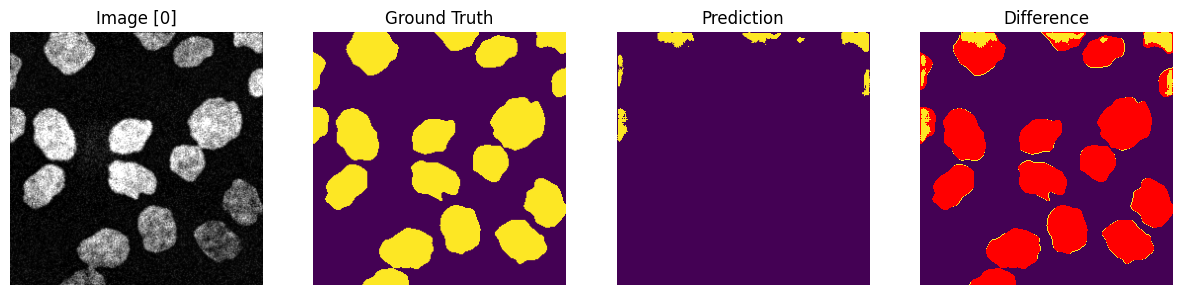

Epoch [2/100]  train_loss: 1.5709  val_loss: 5.1601 iou:0.4207  time: 2.40s lr: 1.00E-03
Epoch [3/100]  train_loss: 1.3107  val_loss: 2.6739 iou:0.4578  time: 2.36s lr: 1.00E-03
Epoch [4/100]  train_loss: 1.1370  val_loss: 1.3458 iou:0.8116  time: 2.44s lr: 1.00E-03
Epoch [5/100]  train_loss: 0.9269  val_loss: 1.3746 iou:0.7955  time: 2.51s lr: 1.00E-03
Epoch [6/100]  train_loss: 0.7987  val_loss: 0.6701 iou:0.9211  time: 2.44s lr: 1.00E-03
Epoch [7/100]  train_loss: 1.0714  val_loss: 0.8855 iou:0.8200  time: 2.44s lr: 1.00E-03
Epoch [8/100]  train_loss: 0.8428  val_loss: 0.6575 iou:0.8826  time: 2.46s lr: 4.00E-04
Epoch [9/100]  train_loss: 0.7343  val_loss: 0.6995 iou:0.8755  time: 2.52s lr: 4.00E-04
Epoch [10/100]  train_loss: 0.6887  val_loss: 0.5965 iou:0.9148  time: 2.47s lr: 4.00E-04
Epoch [11/100]  train_loss: 0.6259  val_loss: 0.5374 iou:0.9259  time: 2.44s lr: 1.60E-04


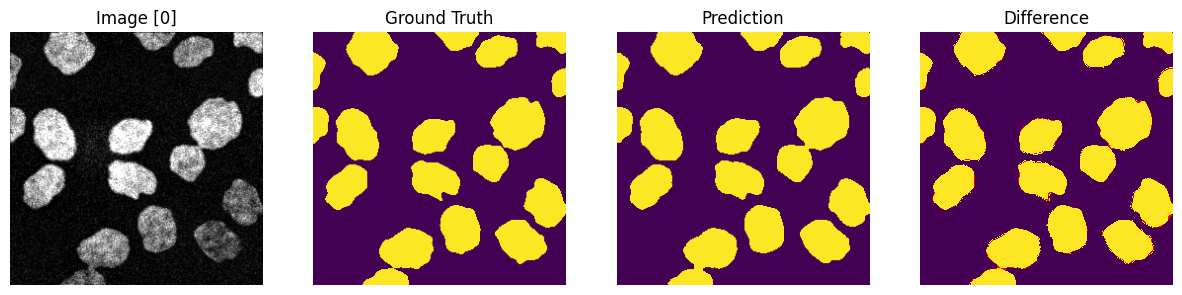

Epoch [12/100]  train_loss: 0.6446  val_loss: 0.6080 iou:0.8922  time: 2.46s lr: 1.60E-04
Epoch [13/100]  train_loss: 0.5958  val_loss: 0.5347 iou:0.9261  time: 2.51s lr: 1.60E-04
Epoch [14/100]  train_loss: 0.5859  val_loss: 0.5450 iou:0.9213  time: 2.51s lr: 6.40E-05
Epoch [15/100]  train_loss: 0.5568  val_loss: 0.5167 iou:0.9247  time: 2.50s lr: 6.40E-05
Epoch [16/100]  train_loss: 0.6077  val_loss: 0.5067 iou:0.9259  time: 2.48s lr: 2.56E-05
Epoch [17/100]  train_loss: 0.5840  val_loss: 0.4969 iou:0.9271  time: 2.46s lr: 2.56E-05
Epoch [18/100]  train_loss: 0.5868  val_loss: 0.5013 iou:0.9265  time: 2.52s lr: 1.02E-05
Epoch [19/100]  train_loss: 0.5787  val_loss: 0.5024 iou:0.9260  time: 2.50s lr: 4.10E-06
Epoch [20/100]  train_loss: 0.6205  val_loss: 0.4971 iou:0.9267  time: 2.46s lr: 1.64E-06
Epoch [21/100]  train_loss: 0.5688  val_loss: 0.4902 iou:0.9276  time: 2.48s lr: 6.55E-07


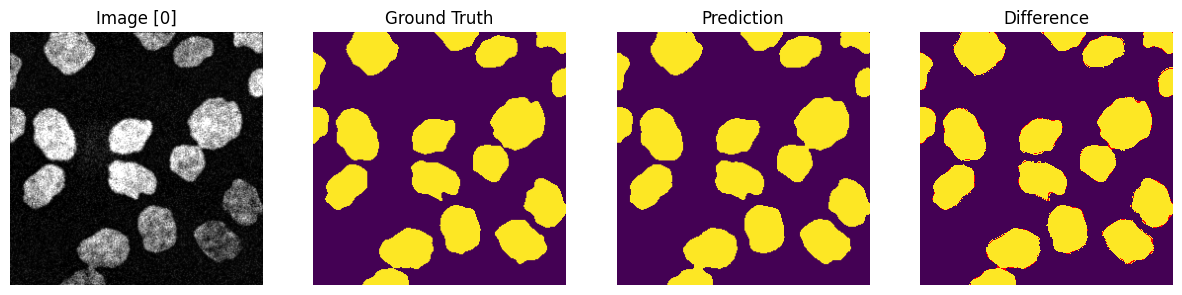

Epoch [22/100]  train_loss: 0.5901  val_loss: 0.4876 iou:0.9281  time: 2.47s lr: 2.62E-07
Epoch [23/100]  train_loss: 0.5635  val_loss: 0.4861 iou:0.9282  time: 2.46s lr: 2.62E-07
Epoch [24/100]  train_loss: 0.5806  val_loss: 0.4892 iou:0.9280  time: 2.35s lr: 1.05E-07
Epoch [25/100]  train_loss: 0.5896  val_loss: 0.4969 iou:0.9266  time: 2.52s lr: 4.19E-08
Epoch [26/100]  train_loss: 0.5595  val_loss: 0.4995 iou:0.9265  time: 2.44s lr: 1.68E-08
Epoch [27/100]  train_loss: 0.5651  val_loss: 0.4959 iou:0.9270  time: 2.47s lr: 6.71E-09
Total time : 67.110786s


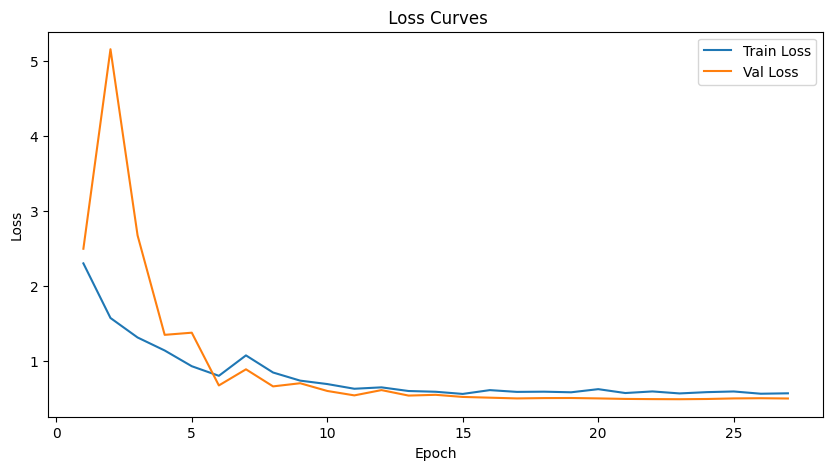

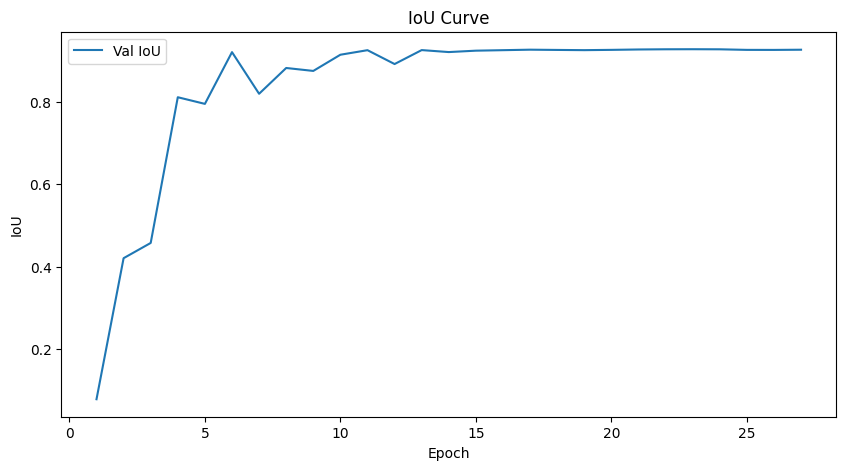

In [58]:
from model import UNet
from sklearn.metrics import jaccard_score

train_dataset_path = f"dataset/generated_cells"

val_ratio      = 0.25
batch_size     = 8
full_dataset = SegmentationDataset(train_dataset_path)

n_val   = max(1, int(len(full_dataset) * val_ratio))
n_train = len(full_dataset) - n_val

perm = torch.randperm(len(full_dataset)).tolist()
train_dataset = Subset(full_dataset, perm[n_val:])
val_dataset   = Subset(full_dataset, perm[:n_val])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,  num_workers=0, pin_memory=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)


num_epochs   = 100
snapshot     = max(1, num_epochs // 10)
model = UNet(n_channels=1, n_classes=1, first_layer_size=64, depth=4).to(device)
start_time = time.time()

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer, factor=0.4)
print(f"Using device: {device}")

model.to(device)
print(f"Starting training for {num_epochs} epochs...")
done_epochs = 0
train_losses, val_losses, val_ious = [], [], []
for epoch in range(num_epochs):
    done_epochs += 1
    start_epoch_time = time.time()
    model.train()
    running = 0.0
    if torch.cuda.is_available(): torch.cuda.reset_peak_memory_stats()
    for imgs, msks in train_loader:
        imgs, msks = imgs.to(device, non_blocking=True), msks.to(device, non_blocking=True).float()
        optimizer.zero_grad(set_to_none=True)
        msks = msks.unsqueeze(1)
        loss = criterion(model(imgs), msks)
        loss.backward()
        scheduler.step(loss)
        optimizer.step()
        running += loss.item() * imgs.size(0)
    tr_loss = running / len(train_loader)
    train_losses.append(tr_loss)

    model.eval()
    val_running = 0.0
    iou_running = 0.0
    with torch.no_grad():
        for imgs, msks in val_loader:
            imgs, msks = imgs.to(device), msks.to(device).float()
            msks = msks.unsqueeze(1)
            out = model(imgs)

            vloss = criterion(out, msks)
            val_running += vloss.item() * imgs.size(0)

            pred = torch.sigmoid(out)
            pred = (pred > 0.5).float()

            iou_running += jaccard_score(
                msks.cpu().numpy().reshape(-1),
                pred.cpu().numpy().reshape(-1)
            )
    va_loss = val_running / len(val_loader)
    va_iou = iou_running / len(val_loader)
    val_losses.append(va_loss)
    val_ious.append(va_iou)
    print(f"Epoch [{epoch+1}/{num_epochs}]  train_loss: {tr_loss:.4f}  val_loss: {va_loss:.4f} iou:{va_iou:.4f}  time: {time.time() - start_epoch_time:.2f}s lr: {scheduler.get_last_lr()[0]:.2E}")

    # ---- snapshot every N/10 epochs on the first training sample
    if epoch % 10 == 0:
        visualize_prediction2(model, train_dataset, device, sample_idx=0)

    if scheduler.get_last_lr()[0] < 1e-8:
        break
        

print(f"Total time : {time.time() - start_time:2f}s")
epochs_range = range(1, done_epochs + 1)

plt.figure(figsize=(10,5))
plt.plot(epochs_range, train_losses, label="Train Loss")
plt.plot(epochs_range, val_losses, label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f" Loss Curves")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs_range, val_ious, label="Val IoU")
plt.xlabel("Epoch")
plt.ylabel("IoU")
plt.title(f"IoU Curve")
plt.legend()
plt.show()
        

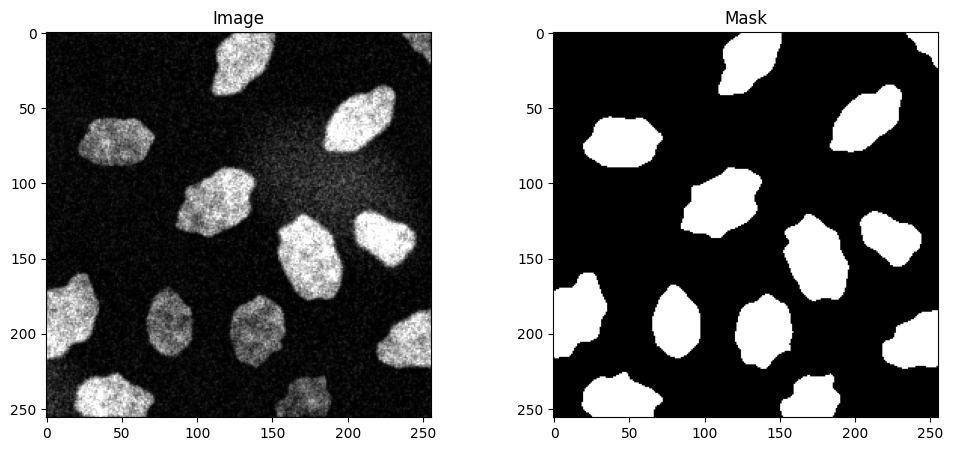

In [3]:
img, msk = dataset[0]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Image")
plt.imshow(img[0], cmap='gray')
plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(msk, cmap='gray')
plt.show()

In [6]:
print(msk.min(), msk.max())
print(msk.unique()[:10])
print(msk.dtype)

tensor(0) tensor(1)
tensor([0, 1])
torch.int64


In [8]:
img, msk = dataset[0]
print("Image:", img.min().item(), img.max().item(), img.dtype)
print("Mask: ", msk.min().item(), msk.max().item(), msk.dtype)
print("Unique mask values:", torch.unique(msk))

Image: 0.0 1.0 torch.float32
Mask:  0 1 torch.int64
Unique mask values: tensor([0, 1])
